In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Remove the invisible character and use a raw string literal
file_path = r"C:\Users\acer\Desktop\excelr\assignments\6 Logistic regression\bank-full (1).csv"

df = pd.read_csv(file_path)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Accuracy: 0.8885325666261197
Confusion Matrix:
[[7799  153]
 [ 855  236]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.61      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.86      9043



C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'population_count')

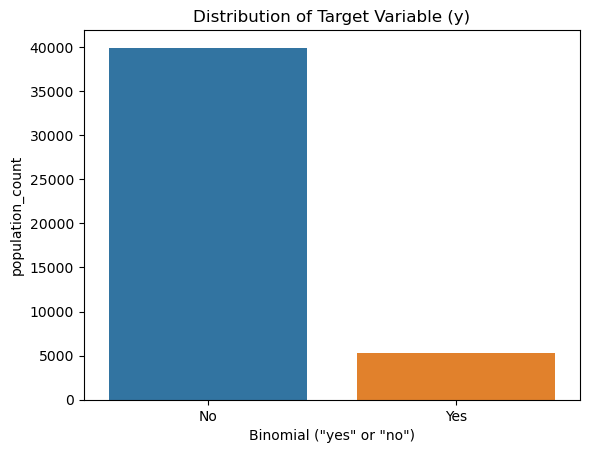

In [5]:
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

X = df.drop('y', axis=1)  
y = df['y']               

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Binomial ("yes" or "no")')
plt.ylabel('population_count')

Text(0, 0.5, 'population_count')

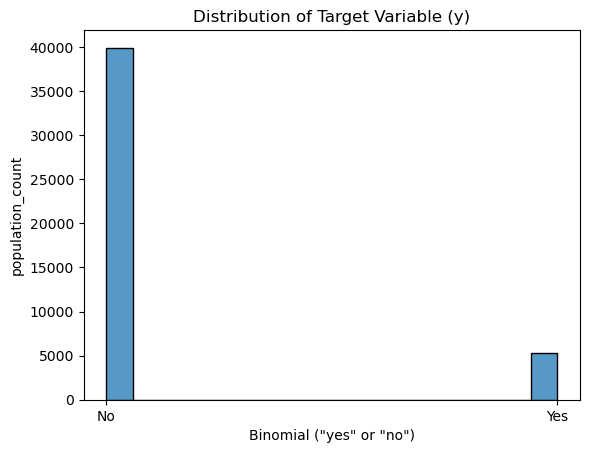

In [6]:
sns.histplot(x='y', data=df)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Binomial ("yes" or "no")')
plt.ylabel('population_count')

Text(0, 0.5, 'population_count')

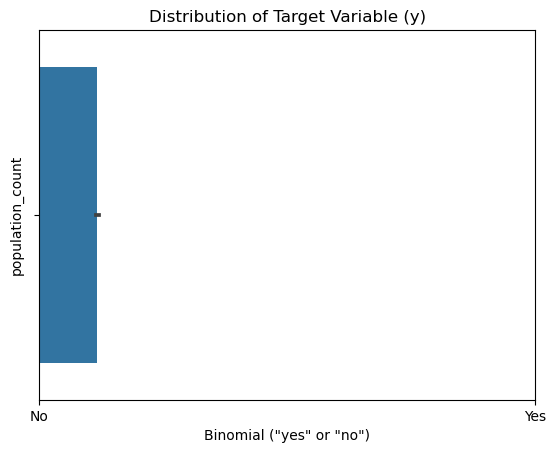

In [8]:
sns.barplot(x='y', data=df)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Binomial ("yes" or "no")')
plt.ylabel('population_count')

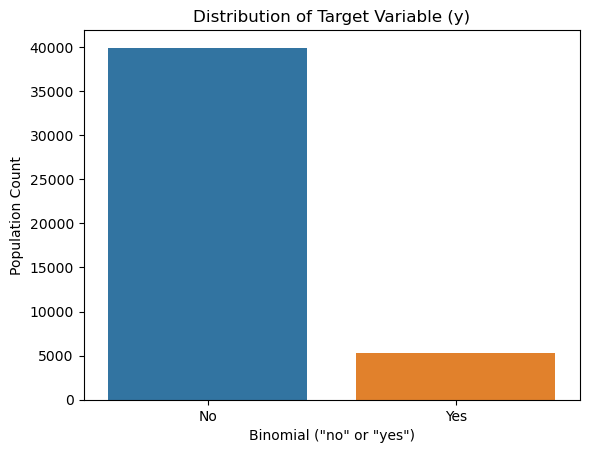

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Binomial ("no" or "yes")')
plt.ylabel('Population Count')
plt.show()


In [9]:
df['y'] = pd.to_numeric(df['y'], errors='coerce')


In [10]:
from sklearn.metrics import roc_curve, auc

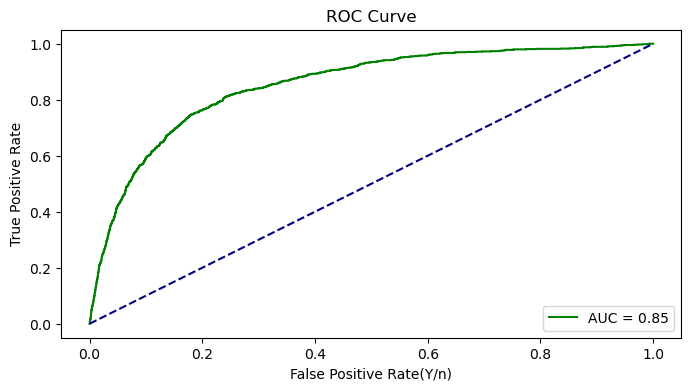

In [11]:
X = df.drop('y', axis=1)  
y = df['y'] 

#predicted probability for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='g', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate(Y/n)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')